In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, zscore

In [101]:
f=pd.read_csv('house_price.csv')
f

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [102]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [11]:
f.shape

(13200, 7)

In [15]:
f.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [17]:
f.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [21]:
f.dtypes

location           object
size               object
total_sqft        float64
bath              float64
price             float64
bhk                 int64
price_per_sqft      int64
dtype: object

<Axes: xlabel='price_per_sqft', ylabel='Count'>

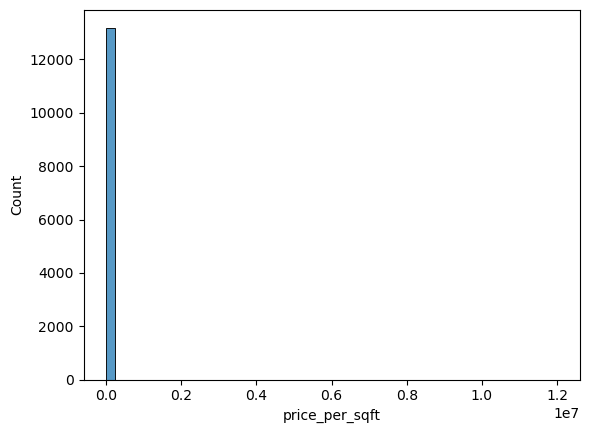

In [76]:
sns.histplot(f['price_per_sqft'], bins=50 )

In [140]:
# Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median


In [49]:
# inter quartile range
q1=f.price_per_sqft.quantile(0.25)
q1

4267.0

In [15]:
iqr=q3-q1

In [11]:
q3=f.price_per_sqft.quantile(0.75)
q3

7317.0

In [17]:
upperl=q3+1.5*iqr
lowerl=q1-1.5*iqr

In [19]:
upperl

11892.0

In [21]:
lowerl

-308.0

In [23]:
with_outliers=f[(f.price_per_sqft < lowerl) | (f.price_per_sqft>upperl)]
with_outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...,...
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083


In [65]:
without_outliers=f[(f.price_per_sqft >= lowerl) & (f.price_per_sqft <= upperl)]
without_outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [53]:
#standard deviation
mean = f['price_per_sqft'].mean()
std = f['price_per_sqft'].std()

upper=mean+3*std
lower=mean-3*std

f_std = f[(f['price_per_sqft']>=lower) & (f['price_per_sqft']<=upper)]
f_std

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [59]:
# percentile
lower = f['price_per_sqft'].quantile(0.05)
upper = f['price_per_sqft'].quantile(0.95)

f_percentile = f[(f['price_per_sqft']>=lower) & (f['price_per_sqft']<=upper)]
f_percentile

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [ ]:
# z-score
df_z = f[(np.abs(zscore(f['price_per_sqft'])) < 3)]
df_z

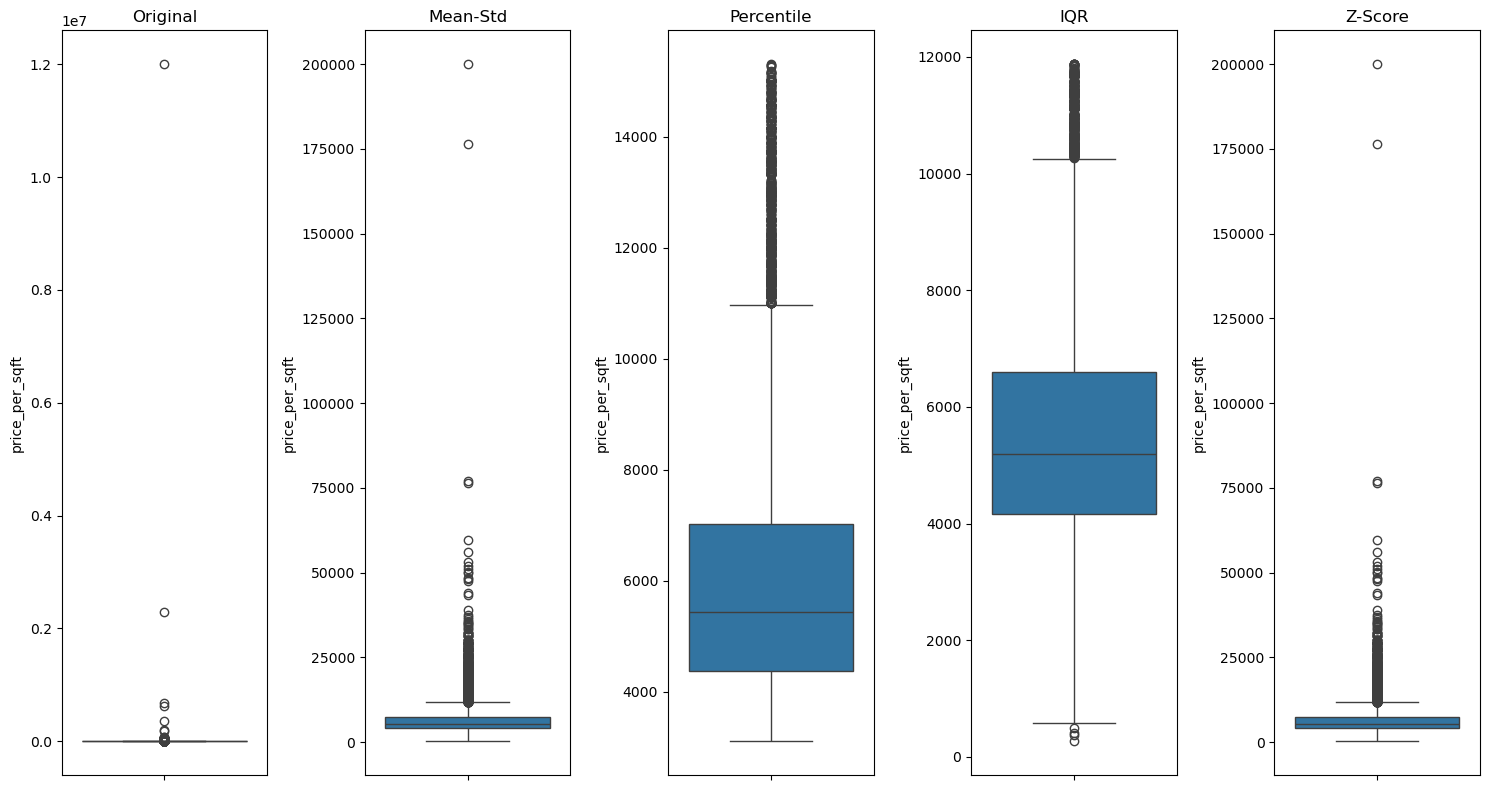

In [107]:
plt.figure(figsize=(15, 8))

datasets = [f, f_std, f_percentile, without_outliers, df_z]
labels = ['Original', 'Mean-Std', 'Percentile', 'IQR', 'Z-Score']

for i, dataset in enumerate(datasets):
    plt.subplot(1,5,i+1)
    sns.boxplot(y=dataset['price_per_sqft'])
    plt.title(labels[i])

plt.tight_layout()


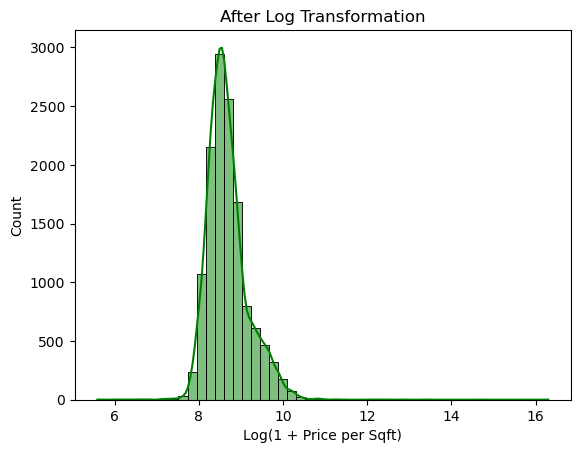

Skewness after: 1.4003259019533636
Kurtosis after: 9.203000543610957


In [126]:
#Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation. 
f['price_per_sqft_log'] = np.log1p(f['price_per_sqft'])

sns.histplot(f['price_per_sqft_log'], bins=50, kde=True, color='green')
plt.title("After Log Transformation")
plt.xlabel("Log(1 + Price per Sqft)")
plt.show()

print("Skewness after:", skew(f['price_per_sqft_log']))
print("Kurtosis after:", kurtosis(f['price_per_sqft_log']))

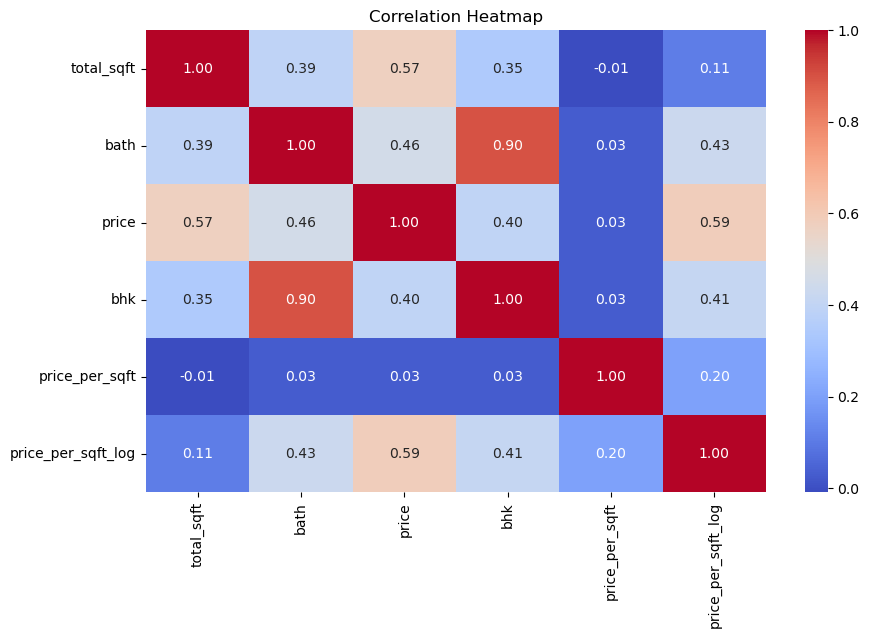

In [130]:
# Check the correlation between all the numerical columns and plot heatmap
numerical_f = f.select_dtypes(include=[np.number])
corr = numerical_f.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


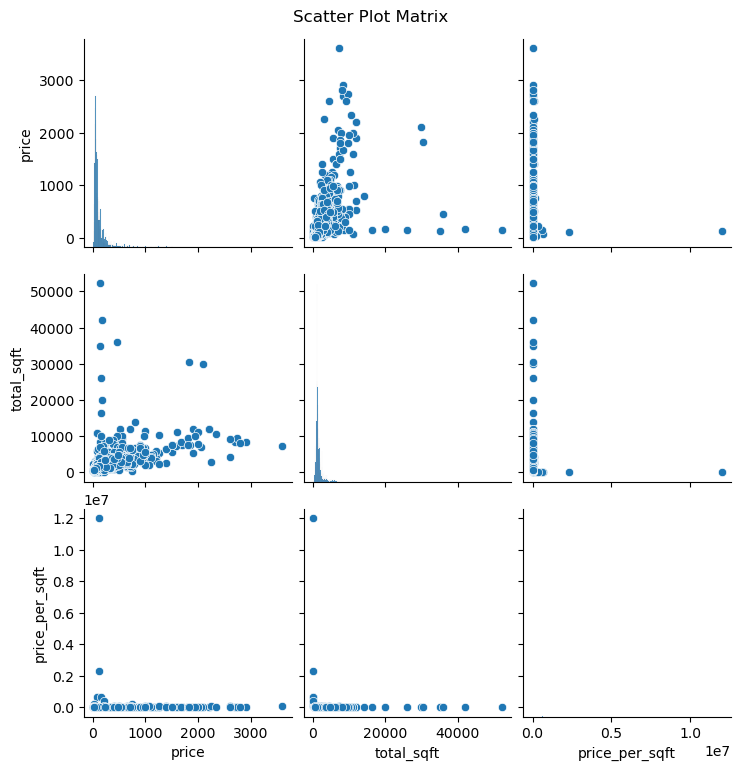

In [136]:
# Draw Scatter plot between the variables to check the correlation between them
sns.pairplot(numerical_f[['price', 'total_sqft', 'price_per_sqft']])
plt.suptitle("Scatter Plot Matrix", y=1.02)
plt.show()
